#### Shim Kyu Gong (심 규 공)

 * **1. Introduction**
 * **2. Import Libraries and Datasets**
  * 2.1 Libraries
  * 2.2 Loading Datasets
  * 2.3 Datasets 상태 체크
  * 2.4 Data 안에 빈 값 확인
 * **3. 전처리(Preprocessing)**
  * 3.1 datatime  전처리
 * **4. Data Cleaning(Explore) with 시각화**
  * 4.1 datetime
  * 4.2 datetime-year & datetime-month
  * 4.3 datetime-hour
  * 4.4 Season & Weather
  * 4.5 count
  * 4.6 Features의 상관 관계
 * **5. Train**
 * **6. Evaluate (성능 검사)**
 * **7. Hyperparameter Tunning (하이퍼패러미터)**
 * **8. Coarse & Finer Search**
   * 8.1 Coarse Search
   * 8.2 Finer Search
 * **9. Use Random Forest**
 * **10. Fit**
 * **11. Predict(예측)**
 * **12. Submit(제출)**
 * **13. 확인**

## 1. Introduction

# Bike Sharing Demand

## 데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 자전거 대여량을 예측하기

이번 캐글 경진대회는 시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여,시간당 자전거 대여량을 예측하는 Bike Sharing Demand 입니다.

## 2. Import Libraries & Datasets

### 2.1 Libraries

In [51]:
# 필요한 Libraries 를 불러옴.

import pandas as pd
import numpy as np
import seaborn as sns # visualization Libraries
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

%config InlineBackend.figure_format = 'retina'
# scikit-learn 패키지의 metrics 모듈에서 make_scorer라는 함수를 가지고 옵니다.
# 이 함수는 파이썬을 구현한 측정 공식을 scikit-learn에서 사용할 수 있도록 변환
from sklearn.metrics import make_scorer

# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_score 함수를 가지고 옵니다.
# 이 함수가 Cross Validation을 담당합니다.
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("C:/Users/kyugs/Desktop/titanic/bike-sharing-demand (1)"))

['bike portfolio.csv', 'bike portfolio1.csv', 'sampleSubmission.csv', 'test.csv', 'train.csv']


### 2.2 Loading Datasets

In [52]:
# 판다스의 read_csv로 train.csv 파일을 읽어옵니다.
# 여기서 datetime은 특별히 날짜로 해석하기 위해 parse_dates 옵션에 넣어줍니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("C:/Users/kyugs/Desktop/titanic/bike-sharing-demand (1)/train.csv", parse_dates=["datetime"])

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [53]:
# train.csv 파일을 읽어온 방식과 동일하게 test.csv를 읽어옵니다.
# 이후 이 데이터를 test라는 이름의 변수에 저장합니다.
test = pd.read_csv("C:/Users/kyugs/Desktop/titanic/bike-sharing-demand (1)/test.csv", parse_dates=["datetime"])

# 마찬가지로 행렬(row, column) 사이즈를 출력하고
print(test.shape)

# 전체 test 데이터에서 상위 5개만 출력합니다.
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### 2.3 Datasets 상태 체크

* datetime - hourly date, timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [54]:
print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         649

### 2.3 Data 안에 빈 값 찾기

In [55]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [56]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

##  3. 전처리(Preprocessing)

분석하고 머신러닝 알고리즘에 집어넣기 위해 간단한 전처리(Preprocessing) 작업 진행.

### 3.1 datetime 전처리

날짜(datetime) 컬럼을 전처리.

In [57]:
# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성합니다.
# 각각의 이름을 datetime-year/month/day/hour/minute/second라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

# dayofweek는 날짜에서 요일(월~일)을 가져오는 기능입니다.
# 값은 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일) 을 나타냅니다.
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [58]:
# datetime-dayofweek를 사람이 이해하기 쉬운 표현으로 변경합니다. (Monday ~ Sunday)
# 이를 datetime-dayofweek(humanized)라는 새로운 컬럼에 추가합니다.
train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-dayofweek, 그리고 datetime-dayofweek(humanized) 컬럼만을 출력합니다.
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(10886, 20)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,5,Saturday
1,2011-01-01 01:00:00,5,Saturday
2,2011-01-01 02:00:00,5,Saturday
3,2011-01-01 03:00:00,5,Saturday
4,2011-01-01 04:00:00,5,Saturday


In [59]:
# test 데이터와 train 데이터와 동일하게 연, 월, 일, 시, 분, 초 컬럼을 생성합니다.
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

# dayofweek 컬럼도 train 데이터와 동일하게 생성합니다.
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


In [60]:
# datetime-dayofweek를 사람이 이해하기 쉬운 표현으로 변경합니다. (Monday ~ Sunday)
# 이를 datetime-dayofweek(humanized)라는 새로운 컬럼에 추가합니다.
test.loc[test["datetime-dayofweek"] == 0, "datetime-dayofweek(humanized)"] = "Monday"
test.loc[test["datetime-dayofweek"] == 1, "datetime-dayofweek(humanized)"] = "Tuesday"
test.loc[test["datetime-dayofweek"] == 2, "datetime-dayofweek(humanized)"] = "Wednesday"
test.loc[test["datetime-dayofweek"] == 3, "datetime-dayofweek(humanized)"] = "Thursday"
test.loc[test["datetime-dayofweek"] == 4, "datetime-dayofweek(humanized)"] = "Friday"
test.loc[test["datetime-dayofweek"] == 5, "datetime-dayofweek(humanized)"] = "Saturday"
test.loc[test["datetime-dayofweek"] == 6, "datetime-dayofweek(humanized)"] = "Sunday"

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 datetime-dayofweek, 그리고 datetime-dayofweek(humanized) 컬럼만을 출력합니다.
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(humanized)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-20 00:00:00,3,Thursday
1,2011-01-20 01:00:00,3,Thursday
2,2011-01-20 02:00:00,3,Thursday
3,2011-01-20 03:00:00,3,Thursday
4,2011-01-20 04:00:00,3,Thursday


## 4. Data Cleaning(Explore) with 시각화

데이터를 분석.

### 4.1 datetime

분석할 컬럼은 **날짜(datetime)**

연/월/일/시/분/초에 따른 자전거 대여량을 시각화.

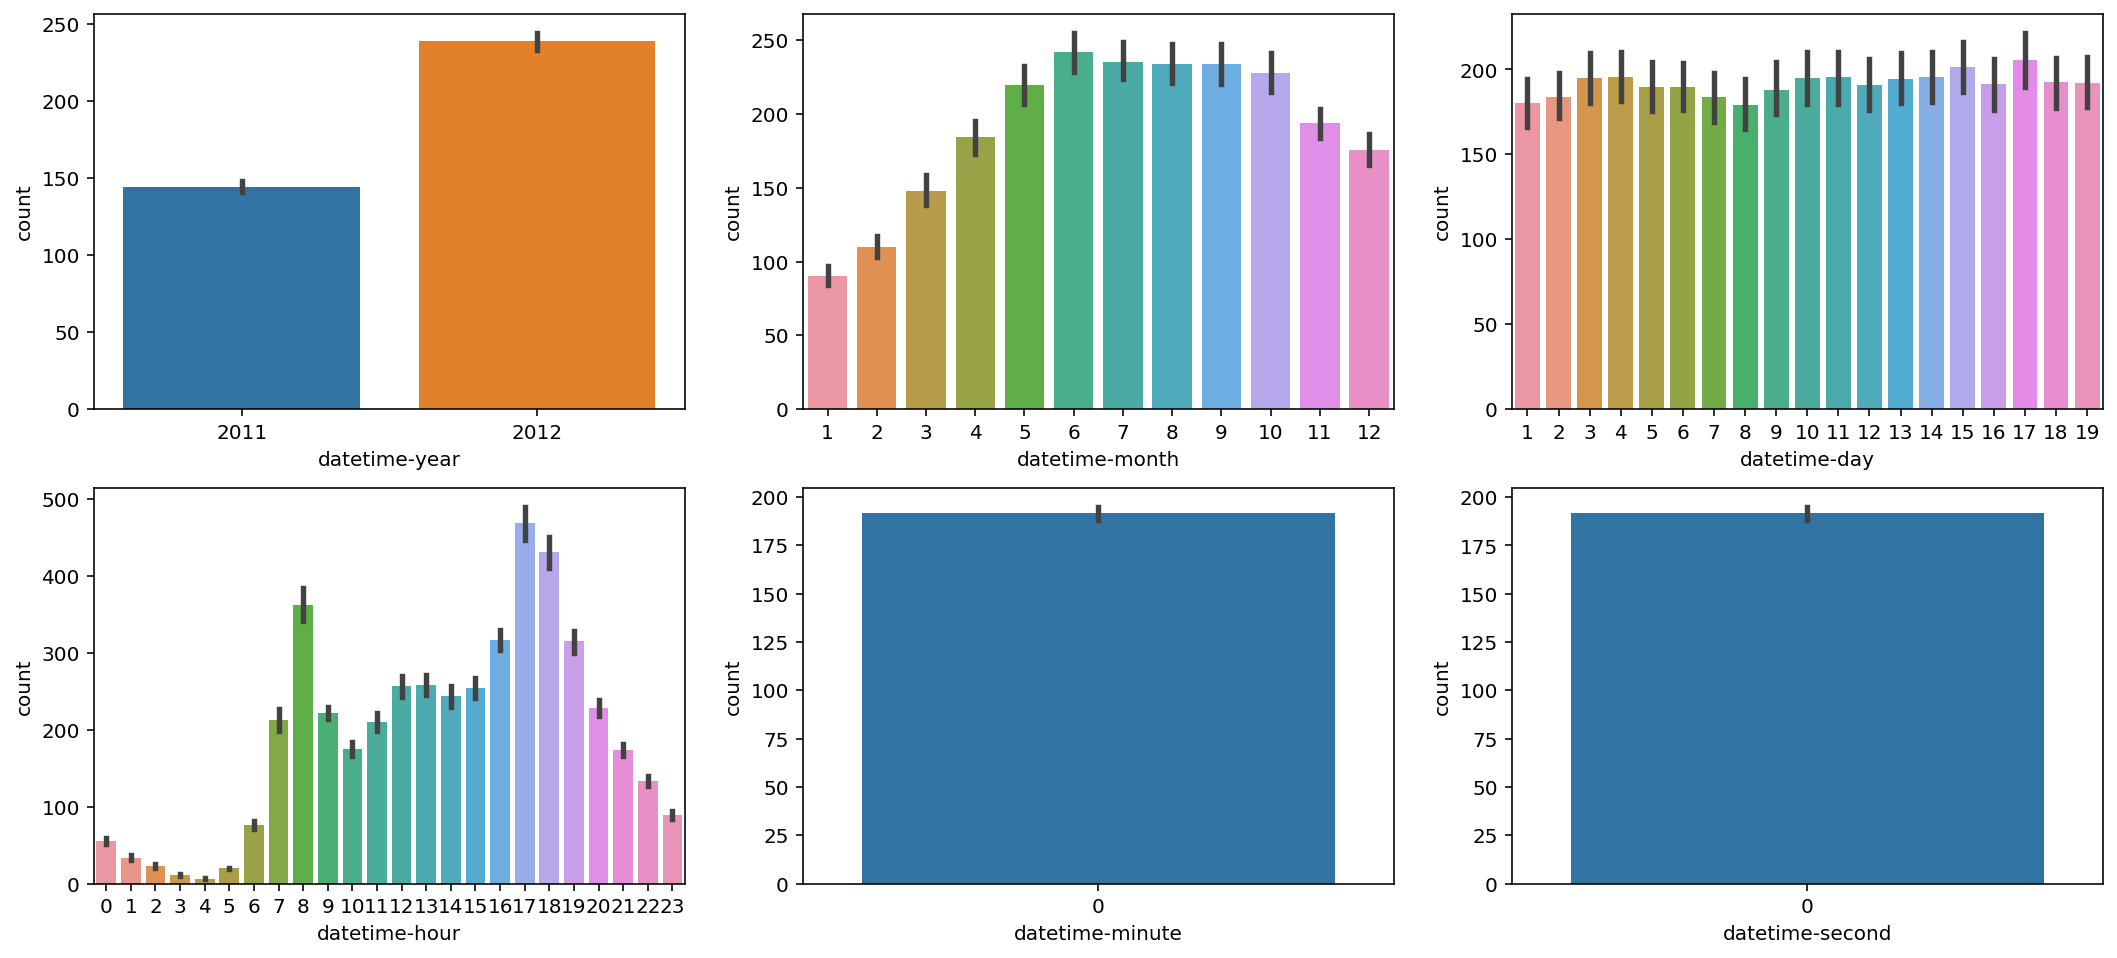

In [61]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

In [62]:
# 필요없는 minute 와 second 칼럼 drop.
train.drop(["datetime-minute", "datetime-second"],inplace=True,axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,Saturday


In [63]:
test.drop(["datetime-minute", "datetime-second"],inplace=True,axis=1)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek,datetime-dayofweek(humanized)
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3,Thursday


위 그래프에서.

**datetime-year**
  * 2011년 자전거 대여량 < 2012년 자전거 대여량.

**datetime-month**
  * 여름(6 ~ 8월)에 자전거 대여, 겨울(12 ~ 2월)에는 자전거 대여 적음.
  * 12월과 1월의 대여 차이가 많이 있음. 조금 더 자세히 알아 볼 필요 있음.
  
**datetime-day**
  * train 데이터 에는 1일부터 19일까지만. 20일은 test 데이터에 있습니다.

**datetime-hour**
  * 새벽 시간에는 사람들이 자전거를 빌리지 않으며, 오후 시간에 상대적으로 자전거를 많이 빌림.
  * 두 부분에서 사람들이 자전거를 특별히 많이 빌리는 데, 바로 출근 시간(7 ~ 9시)과 퇴근 시간(16시 ~ 19시) 입니다.

**datetime-minute** & **datetime-second**
  * 이 두 컬럼은 x축이 모두 0으로 되어있습니다. 즉, **datetime-minute**과 **datetime-second**은 기록 없음. 이 경우에는 feature로 넣어도 큰 의미가 없기 때문에 사용하지 않슴.

### 4.2 datetime-year & datetime-month

연-월을 붙여서 시각화.

 datetime-year_month**라는 새로운 컬럼 생성.

In [64]:
# datetime-year와 datetime-month의 형태를 변환.
# 이전까지는 정수형(int)였지만, pandas의 astype을 통해 문자열(str)로 변환.
# 이 결과를 datetime-year(str)와 datetime-month(str)라는 새로운 컬럼에 집어넣습니다.
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

# datetime-year(str)와 datetime-month(str) 문자열 두 개를 붙여서 datetime-year_month라는 새로운 컬럼을 추가합니다.
# 이 컬럼에는 2011-1부터 2012-12까지의 총 24의 경우의 수가 들어갑니다.
train["datetime-year_month"] = train["datetime-year(str)"] + "-" + train["datetime-month(str)"]

# train 변수에 할당된 데이터의 행렬 사이즈를 출력.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head() train 데이터의 상위 5개를 띄우되,
# datetime과 datetime-year_month 두 개의 컬럼만 출력.
train[["datetime", "datetime-year_month"]].head()

(10886, 21)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


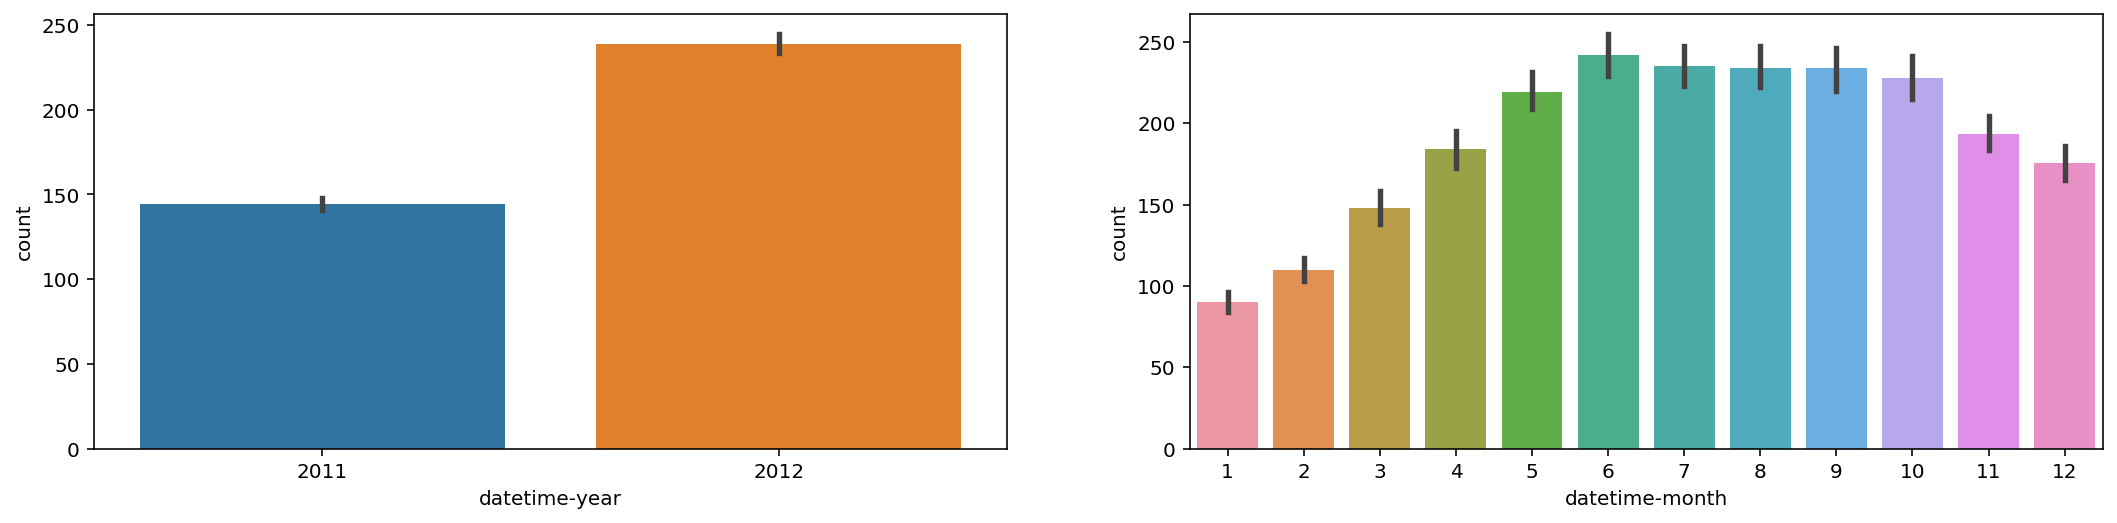

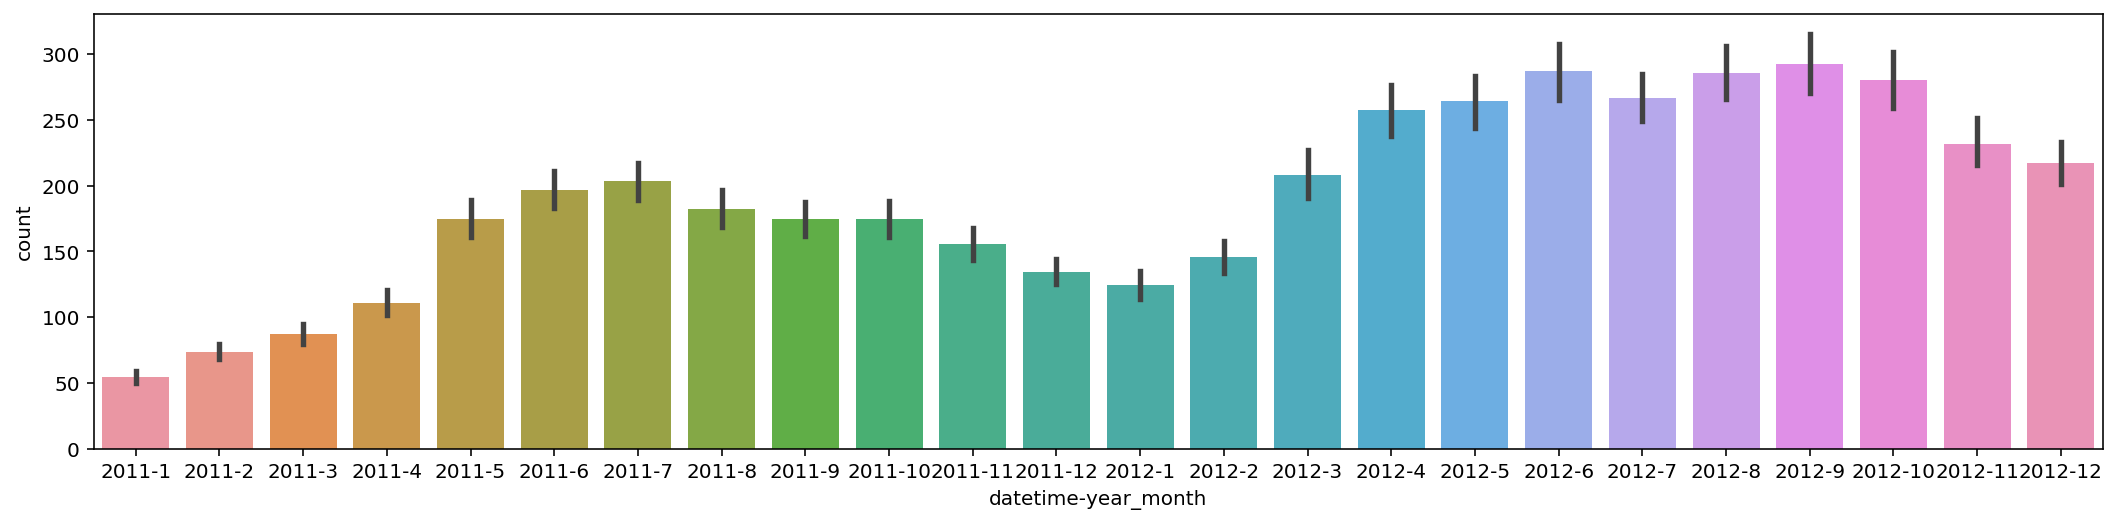

In [65]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 1x2로 총 2개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 시각화의 전체 사이즈는 18x4로 설정.
figure.set_size_inches(18, 4)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월별 자전거 대여량을 출력.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

# 다시 한 번 matplotlib의 subplots를 사용.
# 이번에는 1x1로 1개의 시각화만을 출력합니다.
figure, ax3 = plt.subplots(nrows=1, ncols=1)

# 이 시각화의 전체 사이즈는 18x4로 설정.
figure.set_size_inches(18, 4)

# 이번에는 seaborn의 barplot으로 연-월을 붙여서 자전거 대여량을 출력.
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

위 그래프 정보로,

  * 위 4.1 그래프에서 의문이 들었던, 2011년 12월의 자전거 대여량과 2012년 1월의 자전거 대여량이 큰 차이가 없다는 사실을 발견할 수 있습니다.

### 4.3 datetime-hour

**datetime-hour** 컬럼 분석.

**datetime-hour** 컬럼과 연관석 있는 근무일(workingday)와 요일(datetime-dayofweek)을 함께 분석.

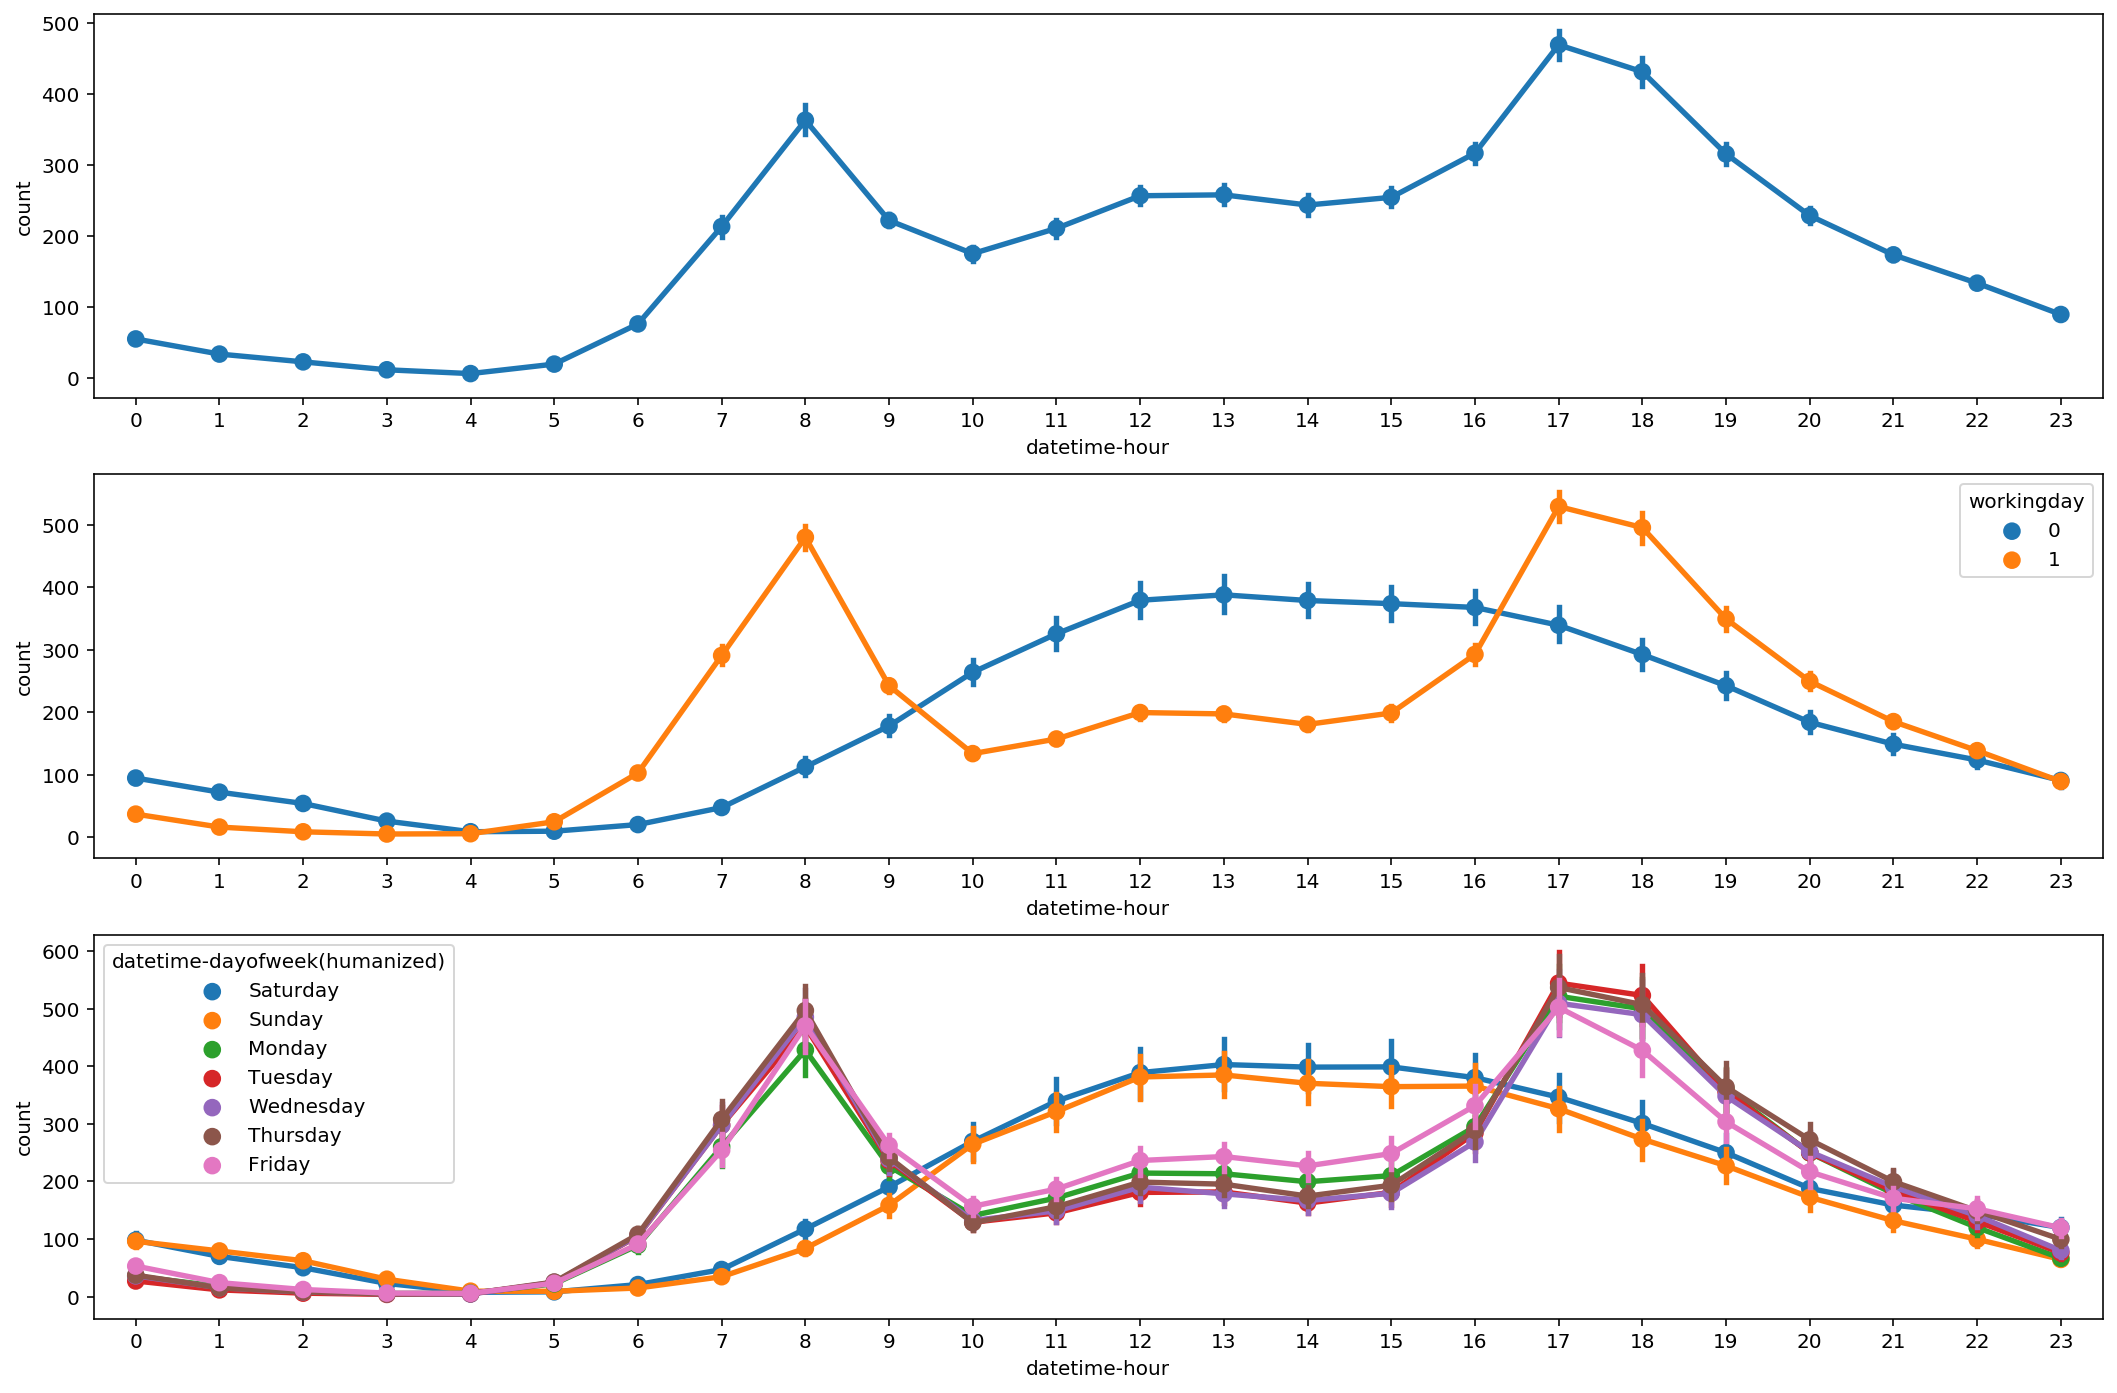

In [66]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 3x1로 총 3개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화의 전체 사이즈는 18x12로 설정.
figure.set_size_inches(18, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화.
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화.
# 하지만 이번에는 근무일(workingday)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

# 비슷하게 seaborn의 pointplot으로 시각당 자전거 대여량을 시각화.
# 하지만 이번에는 요일(datetime-dayofweek)에 따른 차이를 보여줍니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(humanized)", ax=ax3)

위 그래프 정보로,

  * 평일 출근 시간(7 ~ 9시)과 퇴근 시간(16 ~ 19시)에 자전거 빌림.
  * 근무일이 아닐 경우, 오후 시간(10 ~ 16시)에 자전거를 많이 빌리는 것 확인.

**요일(datetime-dayofweek)**별 자전거 대여량.

  * 먼저 금요일을 살펴보면, 다른 주중(월 ~ 목)에 비해 퇴근 시간(17 ~ 19시)에 상대적으로 자전거를 덜 빌리는 사실.
  * 그리고 금요일은 주중임에도 불구하고 상대적으로 오후 시간(10 ~1 6시)의 자전거 대여량이 높음.

### 4.4 Season & Weather

계절과 날씨 칼럼 분석.

In [67]:
# season을 counts
train.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

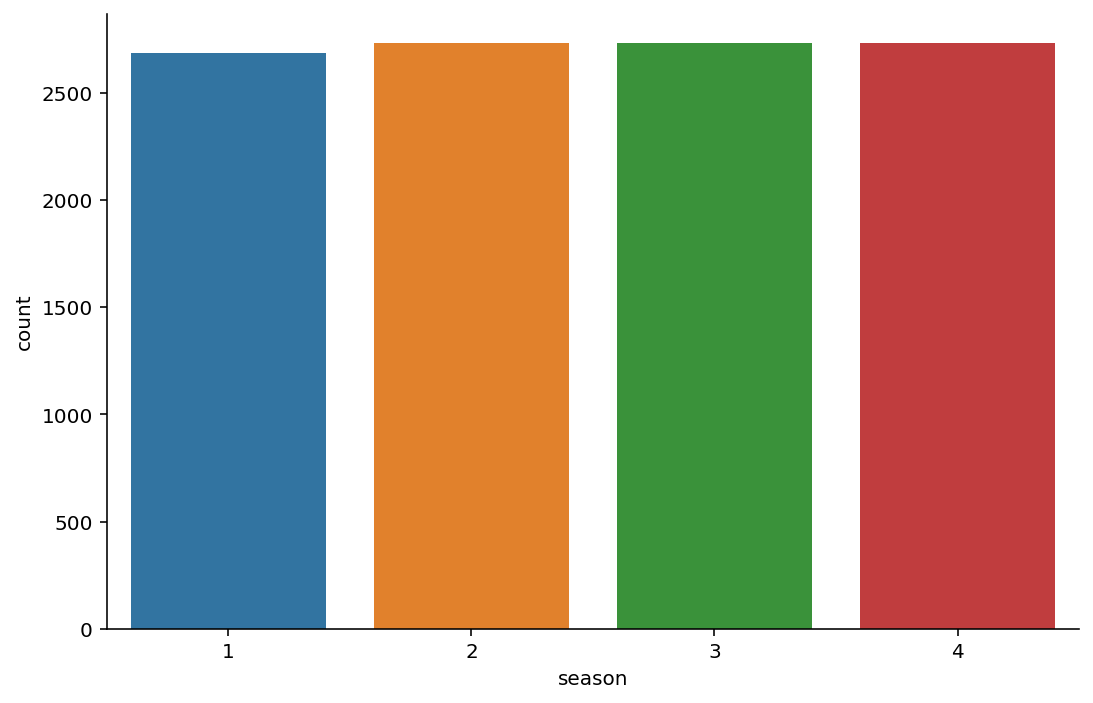

In [68]:
# 시각화
sns.factorplot(x='season',data=train,kind='count',size=5,aspect=1.5)
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

season 칼럼은 균일한 정보 이기 때문에 특이 사항 없음

In [69]:
# weather를 counts
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

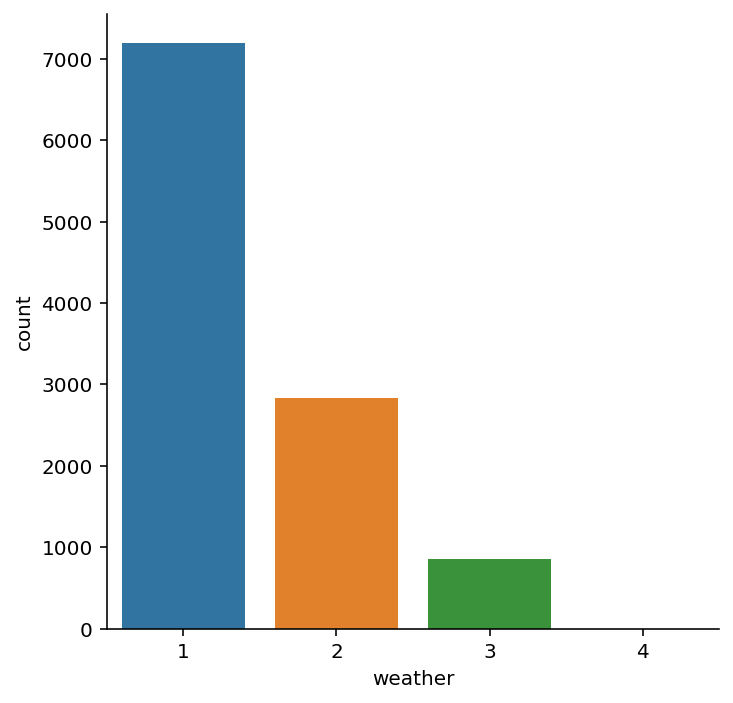

In [70]:
# 시각화
sns.factorplot(x='weather',data=train,kind='count',size=5,aspect=1)  

season과 weather의 각각의 구간을 원본은 살리고 dummies 만들어 준 후 concat로 나눠줌.

In [71]:
# 이 나눈 값을 feature에 대입하기 위해서.
season=pd.get_dummies(train['season'],prefix='season')
train=pd.concat([train,season],axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-hour,datetime-dayofweek,datetime-dayofweek(humanized),datetime-year(str),datetime-month(str),datetime-year_month,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,5,Saturday,2011,1,2011-1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,5,Saturday,2011,1,2011-1,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,2,5,Saturday,2011,1,2011-1,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,3,5,Saturday,2011,1,2011-1,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,4,5,Saturday,2011,1,2011-1,1,0,0,0


In [72]:
# test 데이터도 같이 나눠줌
season=pd.get_dummies(test['season'],prefix='season')
test=pd.concat([test,season],axis=1)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-dayofweek,datetime-dayofweek(humanized),season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3,Thursday,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3,Thursday,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3,Thursday,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,Thursday,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3,Thursday,1,0,0,0


In [73]:
# weather 또한 같은 방법으로 나눠 줌.
weather=pd.get_dummies(train['weather'],prefix='weather')
train=pd.concat([train,weather],axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month(str),datetime-year_month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,2011-1,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,2011-1,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,2011-1,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,2011-1,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,2011-1,1,0,0,0,1,0,0,0


In [74]:
weather=pd.get_dummies(test['weather'],prefix='weather')
test=pd.concat([test,weather],axis=1)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-dayofweek,datetime-dayofweek(humanized),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,3,Thursday,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,3,Thursday,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,3,Thursday,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,3,Thursday,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,3,Thursday,1,0,0,0,1,0,0,0


### 4.5 count

**자전거 대여량(count)** 분석.

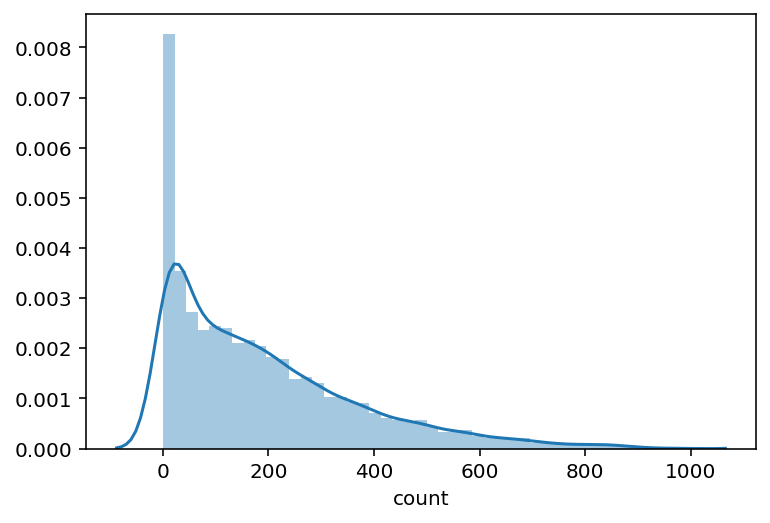

In [75]:
# 자전거 대여량(count)의 분포를 시각화합니다.
sns.distplot(train["count"])

위 그림에서 알 수 있는 내용은 다음과 같습니다.

  * 자전거 대여량이 1 ~ 20대인 비중이 굉장히 높습니다.
  * 반면에 자전거 대여량이 1,000대에 근접하는 경우도 있습니다. (977대)

In [76]:
# 자전거 대여량(count)에 +1을 한 후 log를 적용합니다.
# 이를 log transformation이라고 합니다.
train["log_count"] = np.log(train["count"] + 1)

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# count와 log_count 컬럼만 출력합니다.
train[["count", "log_count"]].head()

(10886, 30)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


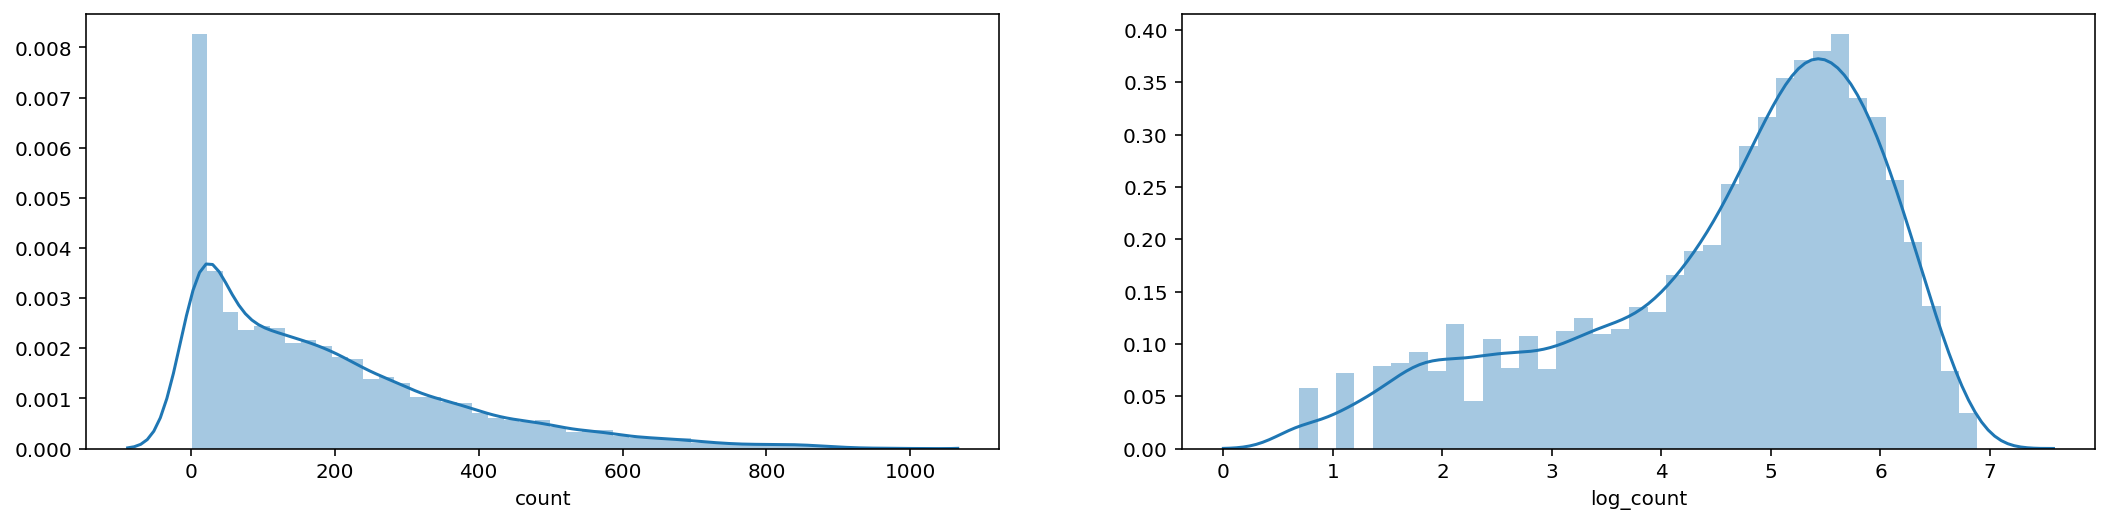

In [77]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 1x2로 총 2개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# 좌측에는 자전거 대여량(count)의 분포를 시각화합니다.
sns.distplot(train["count"], ax=ax1)

# 우측에는 log transformation한 자전거 대여량(log_count)의 분포를 시각화합니다.
sns.distplot(train["log_count"], ax=ax2)

비교 결과 좌측보다 우측이 훨씬 더 자연스럽습니다. 정규 분포에 가깝게 나옵니다.
* **자전거 대여량(count)보다, log transformation한 버전(log_count)을 사용하는게 더 정확.**

In [78]:
# log transformation한 자전거 대여량(log_count)을 다시 exp로 원상복귀 합니다.
# (=자연로그는 exp로 없애버릴 수 있기 때문입니다)
# 이를 count(recover)라는 새로운 컬럼에 대입합니다.
train["count(recover)"] = np.exp(train["log_count"]) - 1

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# count, log_count, 그리고 count(recover) 컬럼만 출력합니다.
train[["count", "log_count", "count(recover)"]].head()

(10886, 31)


,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


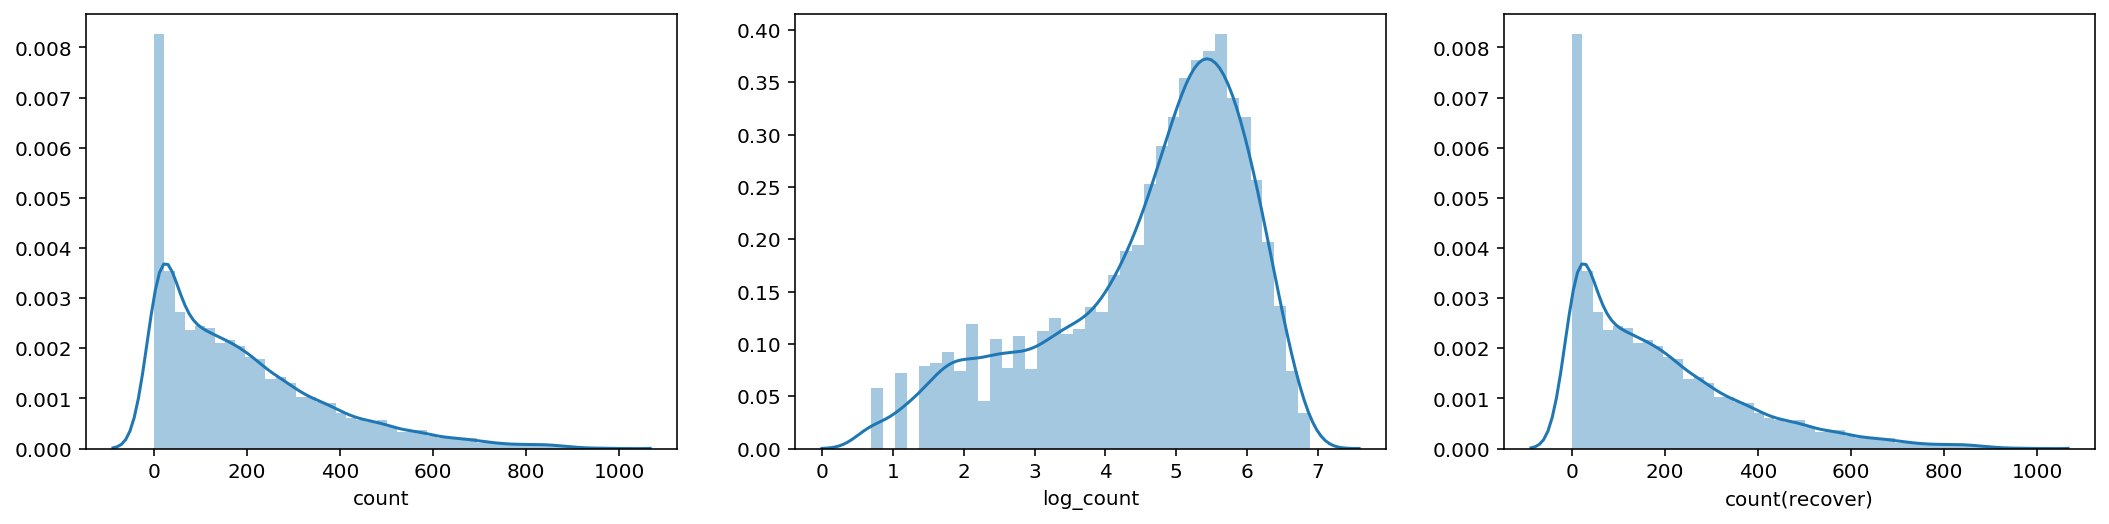

In [79]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 1x3로 총 3개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# 좌측에는 자전거 대여량(count)의 분포를 시각화합니다.
sns.distplot(train["count"], ax=ax1)

# 가운데에는 log transformation한 자전거 대여량(log_count)의 분포를 시각화합니다.
sns.distplot(train["log_count"], ax=ax2)

# 우측에는 log transformation을 다시 원상복귀한 버전(count(recover))의 분포를 시각화합니다.
sns.distplot(train["count(recover)"], ax=ax3)

### 4.6 Features의 상관 관계

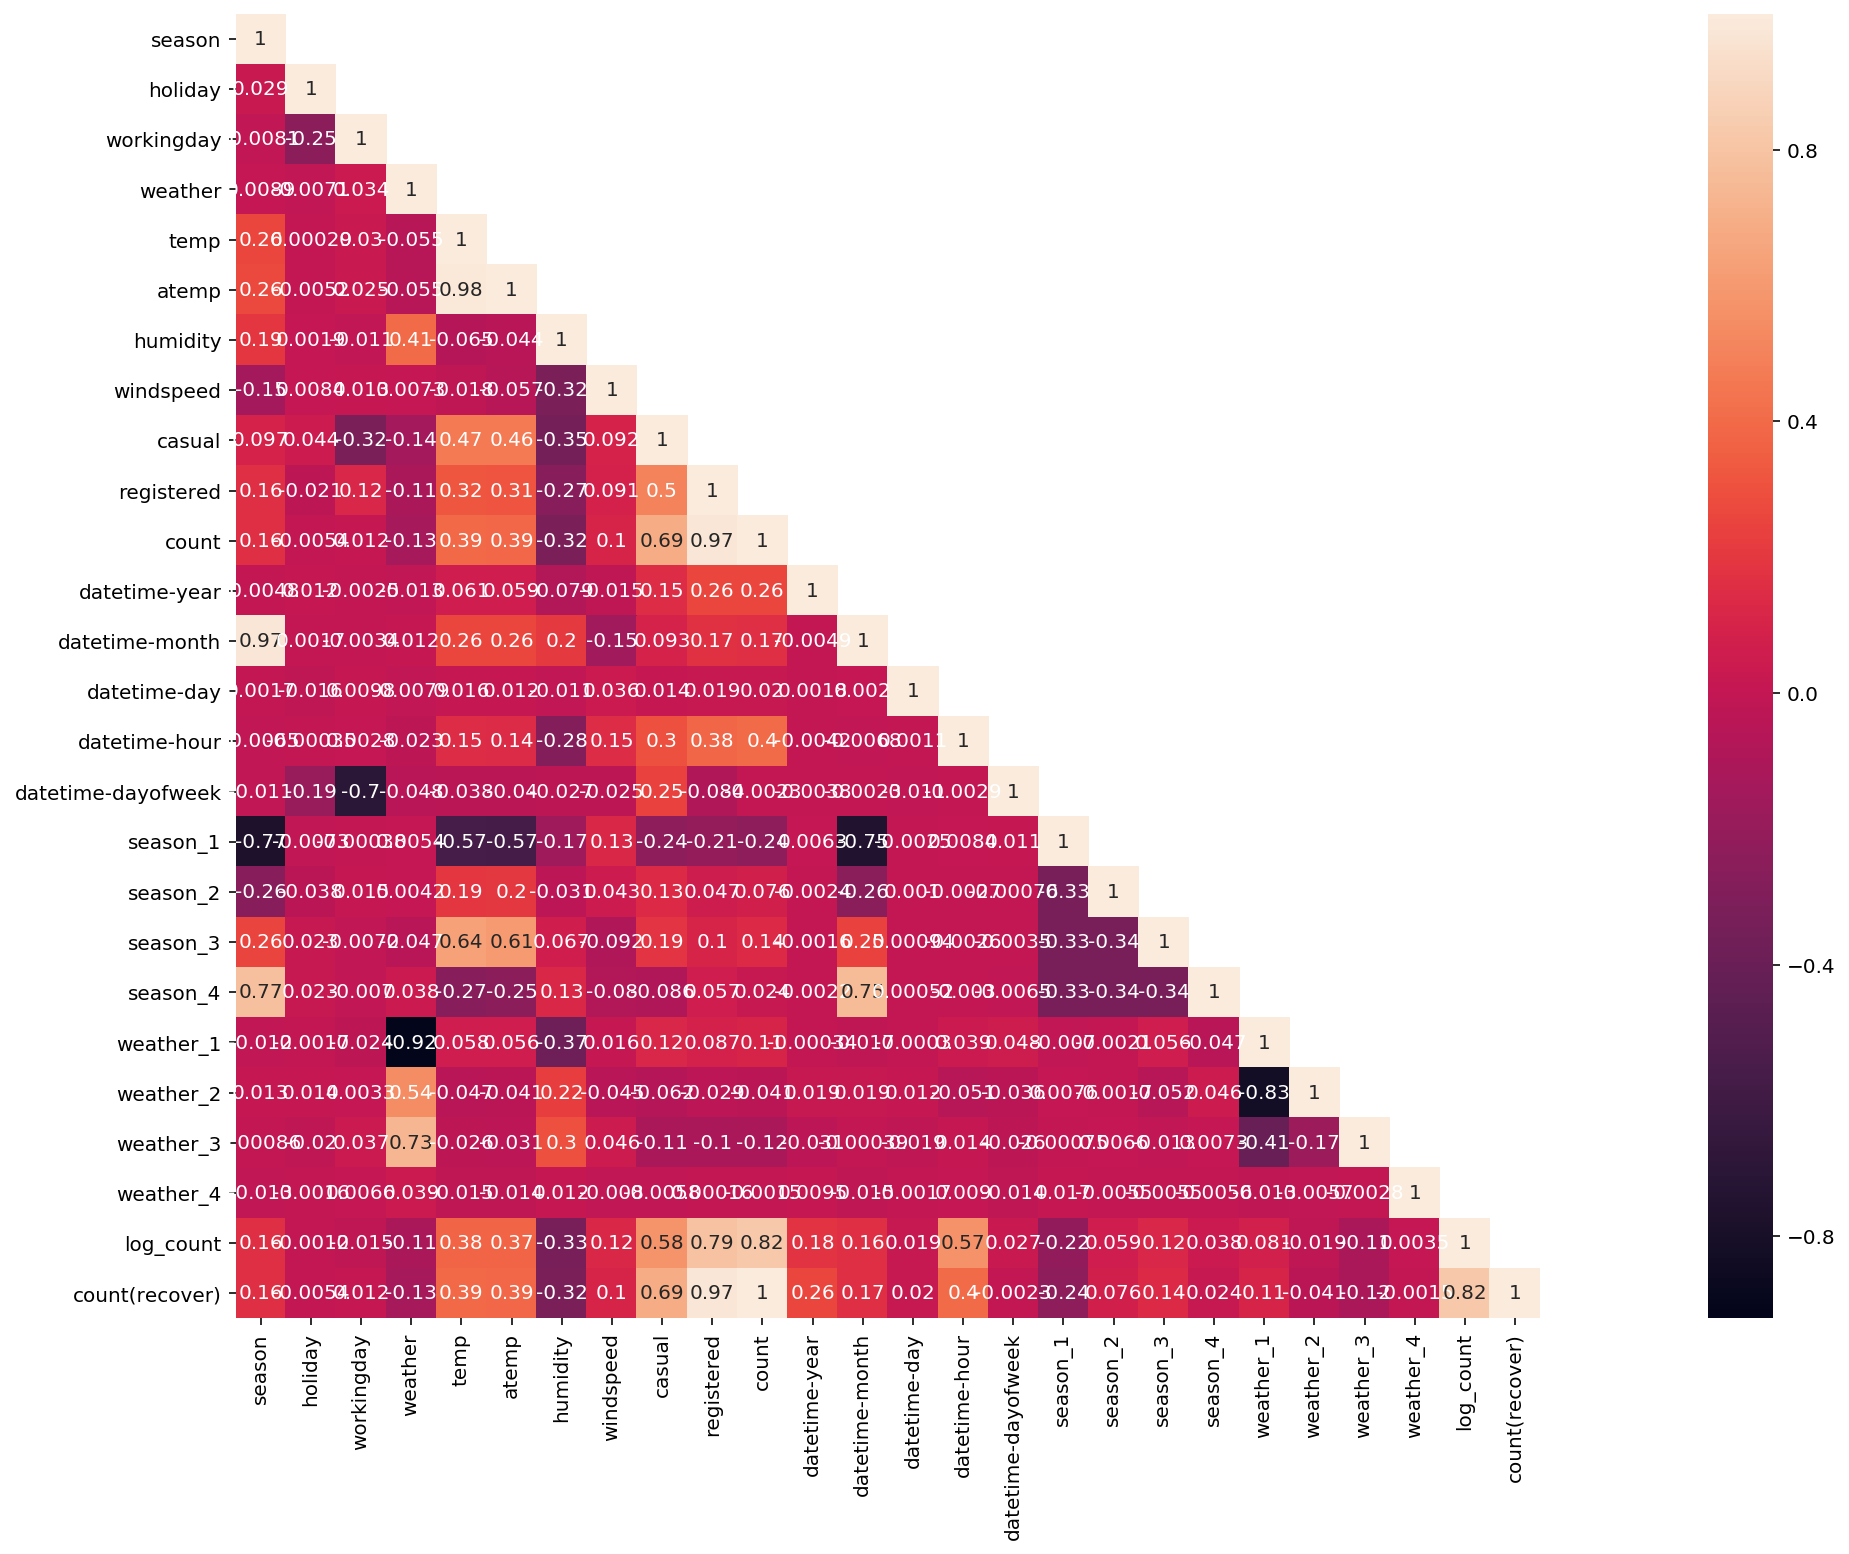

In [80]:
cor_mat= train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

* 위의 heatmap을 통하여 어떤 feature 가 어떤 feature와 상관 관계가 있는지 보여진다.
* 색이 밝을 수록, 그리고 1 에 가까울 수록 연관 관계가 있음을 확인 가능.


## 5. Train

분석을 통해 발견한 정보를 활용 시작.


컬럼들을 Feature와 Label로 활용할 것입니다.

  * **Feature**: "season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"
  
  * **Label**: "log_count"
  
* 여러 컬럼을 feature로 결과를 예측 해봤지만, 위의 feature 가 가장 좋은 결과를 도출함.
  
아래 세가지의 형태로 데이타 나눔.

  * **X_train**: train의 feature = X_train
  * **X_test**: test의 feature = X_test
  * **y_train**: train의 label = y_train

In [31]:
# 컬럼명을 feature_names라는 이름의 파이썬 리스트(list)로 만들어 변수에 할당합니다.

feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [32]:
# log transformation한 자전거 대여량(log_count)을 label로 지정합니다.
label_name = "log_count"
label_name

'log_count'

In [33]:
# feature_names를 활용해 train 데이터의 feature를 가져옵니다.
# 이를 X_train이라는 이름의 변수에 할당합니다.
X_train = train[feature_names]

# X_train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_train.shape)

# X_train 데이터의 상위 5개를 띄웁니다.
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [34]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [35]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train = train[label_name]

# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train.shape)

# y_train 데이터의 상위 5개를 띄웁니다.
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

## 6.  Evaluate

머신러닝 모델을 학습시키기 전에, 측정 공식(Evaluation Metric)을 통해 학습한 모델의 성능이 얼마나 뛰어난지 정량적으로 측정.

In [36]:
# RMSE 공식을 구현한 함수를 생성합니다.
# 이 함수는 예측값(predict)과 정답(actual)을 인자로 받습니다.
def rmse(predict, actual):
    # predict와 actual을 numpy array로 변환합니다.
    # 이렇게 하면 수학 연산을 편하게 할 수 있습니다.
    predict = np.array(predict)
    actual = np.array(actual)

    # 공식에 쓰여진대로 predict와 actual을 빼서 차이를 구합니다.
    # 이 차이를 distance라는 이름의 새로운 변수에 할당합니다.
    distance = predict - actual
    
    # 공식에 쓰여진대로 distance를 제곱합니다.
    # 이 결과를 square_distance라는 이름의 새로운 변수에 할당합니다.
    square_distance = distance ** 2
    
    # 공식에 쓰여진대로 square_distance의 평균을 구합니다.
    # 이 결과를 mean_square_distance라는 이름의 새로운 변수에 할당합니다.
    mean_square_distance = square_distance.mean()
    
    # 공식에 쓰여진대로 mean_square_distance에 루트(sqrt)를 씌웁니다.
    # 이 결과를 score라는 이름의 새로운 변수에 할당합니다.
    score = np.sqrt(mean_square_distance)
    
    # score 변수를 반환합니다.
    return score

# scikit-learn의 make_scorer를 활용하여
# rmse 함수를 scikit-learn의 다른 함수에서 사용할 수 있도록 변환합니다.
# 이 결과를 rmse_score라는 이름의 새로운 변수에 할당합니다.
rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

## 7. Hyperparameter Tuning

머신러닝 모델의 하이퍼패러미터를 튜닝.

In [37]:
# RandomForestRegressor를 생성합니다.
# 생성한 모델을 출력하면 다양한 하이퍼패러미터(n_estimators, max_depth, etc)들이 있는 것을 확인할 수 있습니다.
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

하이어패러미터를 튜닝하는 방법은 크게 두 가지가 있습니다. 이번에는 Coarse & Finer Search라는 방식을 사용 하게씁니다.

## 8. Coarse & Finer Search

이론상으로 존재 가능한 모든 하이퍼패러미터 범위에서 랜덤하게 찾아서 Cross Validation을 사용.

먼저 **Coarse Search**에서는 Random Search를 하되, 이론상으로 존재 가능한 모든 하이퍼패러미터 범위를 집어넣습니다. 이렇게 Random Search를 하면 가장 좋은 하이퍼패러미터를 찾는 것은 어렵지만, **좋지 않은 하이퍼패러미터를 정렬해서 후순위로 놓을 수 있습니다.**

이를 통해 좋지 않은 하이퍼패러미터를 버린 뒤 다시 한 번 Random Search를 하는 것을 **Finer Search**라고 합니다.

**8.1 Coarse Search**

In [38]:
# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 3,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low=2, high=100)

    # 0.1에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low=0.1, high=1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)

    # cross_val_score를 실행합니다. 실행할 때는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 5) scoring. 점수를 측정할 공식입니다. 앞서 구현한 RMSE를 적용합니다.
    # 마지막으로, 이 함수의 실행 결과의 평균(mean)을 구한 뒤 score라는 이름의 새로운 변수에 할당합니다.
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

# coarse_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 10개를 출력합니다.
coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 85, max_features = 0.577396, Score = 0.35736
 1 n_estimators = 300, max_depth = 25, max_features = 0.845730, Score = 0.35011
 2 n_estimators = 300, max_depth = 64, max_features = 0.662469, Score = 0.35180
 3 n_estimators = 300, max_depth = 62, max_features = 0.109736, Score = 0.58330
 4 n_estimators = 300, max_depth = 34, max_features = 0.947785, Score = 0.35064
 5 n_estimators = 300, max_depth = 89, max_features = 0.127732, Score = 0.58330
 6 n_estimators = 300, max_depth = 82, max_features = 0.252632, Score = 0.49277
 7 n_estimators = 300, max_depth = 18, max_features = 0.134697, Score = 0.58673
 8 n_estimators = 300, max_depth = 32, max_features = 0.251952, Score = 0.49276
 9 n_estimators = 300, max_depth = 14, max_features = 0.123251, Score = 0.60815
10 n_estimators = 300, max_depth = 48, max_features = 0.969572, Score = 0.35064
11 n_estimators = 300, max_depth = 22, max_features = 0.191003, Score = 0.49179
12 n_estimators = 300, max_depth = 60, m

,epoch,score,n_estimators,max_depth,max_features
92,92,0.349243,300,20,0.833132
47,47,0.349393,300,17,0.826052
99,99,0.349687,300,58,0.907240
31,31,0.349687,300,55,0.845793
75,75,0.349687,300,42,0.885575
56,56,0.349687,300,55,0.825250
18,18,0.349687,300,55,0.883866
34,34,0.349687,300,67,0.903611
53,53,0.349687,300,67,0.842501
60,60,0.349915,300,27,0.790045


Coarse Search가 끝난 후, 상위 5 ~ 10개의 결과만 출력 뒤 이 결과를 낸 하이퍼패러미터 범위만 남겨놓고 다시 한 번 Random Search(Finer Search).

**8.2 Finer Search**

In [39]:
# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_score 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_score

# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 3,000)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
finer_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 40에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low=40, high=100)

    # 0.6에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low=0.6, high=1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)

    # cross_val_score를 실행합니다. 실행할 때는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 5) scoring. 점수를 측정할 공식입니다. 앞서 구현한 RMSE를 적용합니다.
    # 마지막으로, 이 함수의 실행 결과의 평균(mean)을 구한 뒤 score라는 이름의 새로운 변수에 할당합니다.
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    finer_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# finer_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
finer_hyperparameters_list = pd.DataFrame.from_dict(finer_hyperparameters_list)

# 변환한 finer_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by="score")

# finer_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(finer_hyperparameters_list.shape)

# finer_hyperparameters_list의 상위 10개를 출력합니다.
finer_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 52, max_features = 0.836154, Score = 0.34969
 1 n_estimators = 300, max_depth = 48, max_features = 0.709760, Score = 0.35180
 2 n_estimators = 300, max_depth = 46, max_features = 0.736832, Score = 0.34992
 3 n_estimators = 300, max_depth = 76, max_features = 0.615643, Score = 0.35736
 4 n_estimators = 300, max_depth = 59, max_features = 0.948086, Score = 0.35064
 5 n_estimators = 300, max_depth = 78, max_features = 0.723047, Score = 0.35180
 6 n_estimators = 300, max_depth = 55, max_features = 0.877203, Score = 0.34969
 7 n_estimators = 300, max_depth = 83, max_features = 0.919084, Score = 0.35064
 8 n_estimators = 300, max_depth = 51, max_features = 0.732935, Score = 0.34992
 9 n_estimators = 300, max_depth = 43, max_features = 0.611505, Score = 0.35736
10 n_estimators = 300, max_depth = 77, max_features = 0.861472, Score = 0.34969
11 n_estimators = 300, max_depth = 90, max_features = 0.675686, Score = 0.35180
12 n_estimators = 300, max_depth = 66, m

,epoch,score,n_estimators,max_depth,max_features
93,93,0.349687,300,75,0.879998
34,34,0.349687,300,70,0.866140
61,61,0.349687,300,94,0.909033
0,0,0.349687,300,52,0.836154
46,46,0.349687,300,98,0.845063
47,47,0.349687,300,89,0.877675
55,55,0.349687,300,51,0.906961
56,56,0.349687,300,60,0.856382
57,57,0.349687,300,89,0.829780
27,27,0.349687,300,53,0.904226


탐색 결과 다음의 하이퍼패러미터가 가장 좋은 하이퍼패러미터라 발견.

In [40]:
# 가장 score가 낮게 나온(=좋은 정확도가 나온) 하이퍼패러미터를 가져옵니다.
# 이를 best_hyperparameters라는 이름의 변수에 저장합니다.
best_hyperparameters = finer_hyperparameters_list.iloc[0]

# best_hyperparameters에서 max_depth 하이퍼패러미터만 가져옵니다.
# 이를 best_max_depth라는 이름의 변수에 저장합니다.
best_max_depth = best_hyperparameters["max_depth"]

# best_hyperparameters에서 max_features 하이퍼패러미터만 가져옵니다.
# 이를 best_max_features라는 이름의 변수에 저장합니다.
best_max_features = best_hyperparameters["max_features"]

# best_max_depth와 best_max_features를 출력합니다.
print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

max_depth(best) = 75.0, max_features(best) = 0.879998


## 9. Use Random Forest

Hyperparameter Tuning으로 만족스러운 하이퍼패러미터를 찾았다면, 이제 이 하이퍼패러미터를 활용하여 머신러닝 모델을 학습.

  * **fit**: 머신러닝 알고리즘을 학습. train 데이터의 feature(X_train)와 label(y_train) 사용.
  * **predict**: **fit**이 끝난 후, **predict**를 통해 예측. test 데이터의 feature(X_test) 사용.

In [41]:
# 하이퍼패러미터 튜닝이 끝났으면, 이제 n_estimators를 가능한 높은 값을 주겠습니다.
best_n_estimators = 3000

# 주의: 혹시 하이퍼패러미터 튜닝을 하는데 시간이 너무 오래 걸린다면,
# 이를 대신해서 다음의 하이퍼패러미터를 사용해주세요. (아래 두 줄의 주석을 풀면 됩니다)
# best_max_depth = 83
# best_max_features = 0.851358
        
# RandomForestRegressor를 생성합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) n_estimators. 트리의 갯수입니다. 지정한 갯수만큼 트리를 생성합니다.
# 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
# 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
# 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=37,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=75.0,
                      max_features=0.8799978171937765, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

## 10. Fit

Random Forest 학습 시작. 1) train 데이터의 feature인 ```X_train```, 그리고 2) train 데이터의 label인 ```y_train``` 사용.

In [42]:
# RandomForestRegressor를 학습(fitting)합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=75.0,
                      max_features=0.8799978171937765, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

## 11. Predict (예측)

Random Forest학습 후, test 데이터에 있는 자전거 대여량  예측. 
* 예측은 model.predict로 하고, test 데이터의 feature인 X_test 사용.

In [43]:
# fit이 끝났으면, predict라는 기능을 사용하여 log transformation한 자전거 대여량(log_count)을 예측합니다.
# log_predictions의 실행이 끝나면 test 데이터의 log transformation한 자전거 대여량(log_count)을 반환하며,
# 이를 predictions라는 이름의 변수에 할당합니다.
log_predictions = model.predict(X_test)

# log_predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(log_predictions.shape)

# log_predictions 변수를 출력합니다.
log_predictions

(6493,)


array([2.51395338, 1.73432803, 1.41821512, ..., 4.59957903, 4.58894783,
       3.87214013])

**Random Forest에서 예측한 것은 자전거 대여량(count)이 아닌 log transformation한 자전거 대여량(log_count)입니다.** 이를 다시 자전거 대여량(count)으로 원상복구 하기 위해 exp func 사용.

In [44]:
# log transformation한 자전거 대여량(log_count)을 다시 exp로 원상복귀 합니다.
# (=자연로그는 exp로 없애버릴 수 있습니다)
# 이를 predictions라는 새로운 변수에 할당합니다.
predictions = np.exp(log_predictions) - 1

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수를 출력합니다.
predictions

(6493,)


array([11.35367239,  4.66511975,  3.12974278, ..., 98.44244437,
       97.39085218, 47.04509898])

## 12. Submit (제출)

Random Forest의 fit과 predict 를 통해 우리는 test 데이터에 있는 자전거 대여량(count)을 예측.

In [45]:
# 캐글이 제공하는 제출 포멧(sampleSubmission.csv)을 읽어옵니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("C:/Users/kyugs/Desktop/titanic/bike-sharing-demand (1)/sampleSubmission.csv")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [46]:
# 제출 포멧(submission)의 자전거 대여량(count) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 6493개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["count"] = predictions

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.353672
1,2011-01-20 01:00:00,4.665120
2,2011-01-20 02:00:00,3.129743
3,2011-01-20 03:00:00,3.274112
4,2011-01-20 04:00:00,2.688771


In [47]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("C:/Users/kyugs/Desktop/titanic/bike-sharing-demand (1)/bike portfolio1.csv", index=False)

이제 캐글의 [제출 페이지(Late Submission)](https://www.kaggle.com/c/bike-sharing-demand/submit)로 이동해, 파일을 제출하면 점수를 확인.

## 13. 확인

#### 제출 결과 상위 5 %(0.39137) 임을 확인 하였습니다.

In [48]:
pd.read_csv("C:/Users/kyugs/Desktop/titanic/bike-sharing-demand (1)/bike portfolio1.csv")

,datetime,count
0,2011-01-20 00:00:00,11.353672
1,2011-01-20 01:00:00,4.665120
2,2011-01-20 02:00:00,3.129743
3,2011-01-20 03:00:00,3.274112
4,2011-01-20 04:00:00,2.688771
5,2011-01-20 05:00:00,6.256491
6,2011-01-20 06:00:00,37.582727
7,2011-01-20 07:00:00,105.643144
8,2011-01-20 08:00:00,235.546642
9,2011-01-20 09:00:00,133.904706


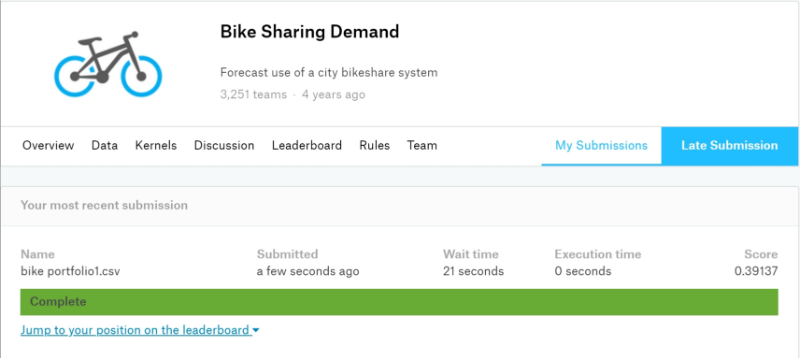

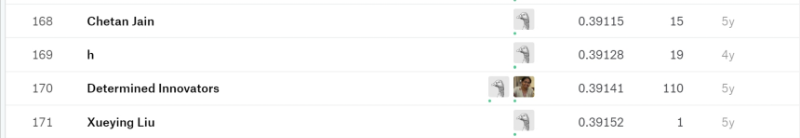

* 지금은 순위를 등록 할수 없지만, 0.39137 점수로 미루어 볼때 170 위 로 가정 할수 있다. 총 순위 3251 중. 170위. 상위 5% 기록